BOOSTING TECHNIQUES ASSIGNMENT

1. What is Boosting in Machine Learning? Explain how it improves weak learners.
- Boosting is an iterative ensemble learning technique where multiple weak learners (simple models that perform only slightly better than random guessing) are combined sequentially to create a single, strong predictive model.
- It improves weak learners by repeatedly focusing on the errors made by previous models, assigning more weight to misclassified data points.
- This iterative process of correcting mistakes reduces bias, leading to an overall more accurate and robust model that can learn complex patterns in the data.

2. What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?
- AdaBoost > Adaptive Sampling focuses on correcting misclassified samples.
  - In each iteration, AdaBoost trains a weak learner, then identifies misclassified data points.
  - Models become increasingly focused on harder-to-classify examples.
- Gradient Boosting > Minimise overall loss function through successive error correction.
  - It builds models sequentially, with each new model trying to correct the errors of the previous ones.
  - The combined model gradually learns to reduce prediction errors, improving overall accuracy.

3. How does regularization help in XGBoost?
- Regularization in XGBoost helps prevent overfitting and improve the generalization ability of the model by controlling its complexity.
- It achieves this by adding penalty terms to the objective function, which the algorithm minimizes during training.

4. Why is CatBoost considered efficient for handling categorical data?
- CatBoost is considered efficient for handling categorical data primarily due to its innovative and automatic internal mechanisms, which eliminate the need for extensive manual preprocessing and mitigate common issues like target leakage.
- Key reasons for CatBoost's efficiency with categorical data:
  - Ordered Target Encoding
  - Automatic Handling
  - Permutation Driven Pre Sorting
  - Feature Combination
  - Oblivious Trees

5. What are some real-world applications where boosting techniques are preferred over bagging methods?
- Boosting outperforms bagging for high bias models and complex prediction models.
- Some of the real world examples are:
  - Credit Scoring
  - Fraud Detection
  - Disease Prediction
  - Marketing Analytics
- Some data mining tasks where precision is paramount.

6. Write a Python program to:
- Train an AdaBoost Classifier on the Breast Cancer dataset
- Print the model accuracy


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("AdaBoost Classifier Accuracy on Breast Cancer Dataset: {:.2f}%".format(accuracy * 100))

AdaBoost Classifier Accuracy on Breast Cancer Dataset: 95.61%


7. Write a Python program to:
- Train a Gradient Boosting Regressor on the California Housing dataset
- Evaluate performance using R-squared score

In [2]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,
                                  max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate using R-squared score
r2 = r2_score(y_test, y_pred)

# Print result
print("Gradient Boosting Regressor R-squared Score on California Housing Dataset: {:.4f}".format(r2))

Gradient Boosting Regressor R-squared Score on California Housing Dataset: 0.8004


8. Write a Python program to:
- Train an XGBoost Classifier on the Breast Cancer dataset
- Tune the learning rate using GridSearchCV
- Print the best parameters and accuracy


In [3]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)

# Define parameter grid for learning rate tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best Parameters:", grid_search.best_params_)
print("XGBoost Classifier Accuracy on Breast Cancer Dataset: {:.2f}%".format(accuracy * 100))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [02:19:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.1}
XGBoost Classifier Accuracy on Breast Cancer Dataset: 94.74%


9. Write a Python program to:
- Train a CatBoost Classifier
- Plot the confusion matrix using seaborn

CatBoost Classifier Accuracy: 97.37%


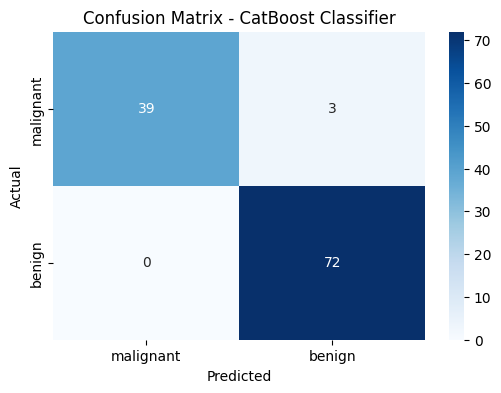

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize CatBoost Classifier (silent training)
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Classifier Accuracy: {:.2f}%".format(accuracy * 100))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()

10. You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and categorical features.

Describe your step-by-step data science pipeline using boosting techniques:
- Data preprocessing & handling missing/categorical values
- Choice between AdaBoost, XGBoost, or CatBoost
- Hyperparameter tuning strategy
- Evaluation metrics you'd choose and why
- How the business would benefit from your model

Step 1: Data preprocessing and handling missing values
- Handle missing values
  - For numeric: Impute with median or let XGBosst/CatBoost handle Nan.
  - For categorical: CatBoost can directly handle
  

Step 2: Handle Class Imbalance
- Assign class weight in XGBoost
- Use SMOTE on train data if required.

Step 3: Choose the boosting algorithm
- CatBoost > Best for categorical features and missing values.
- XGBoost > Strong baseline widely used for imbalanced class data.
- AdaBoost > Simple but weaker for complex tabular data.

Step 4: Train data & Hyperparameter Tuning
- Use train test validation split of data
- Tune parameters like
  - learning_rate
  - depth / max_depth
  - n_estimators (with early stopping)
  - l2_regularization
  - class_weights
- Use GridSearchCV or RandomizedSeaarchCV for tuning.

Step 5: Model Evaluation
- Since data is imbalanced, use these metrics just than accuracy.
  - ROC-AUC
  - F1 -recall
  - Confusion matrix

Business benefits are:
- Reduce Credit Losses
- Increase Safe Approvals
- Risk Based Pricing
- Better Regulatory Compliance